# Case 1 Resolution

## *Leonardo Ieracitano Vieira*

Welcome to the resolution of case 1. If you want to view a specific question, browse the index that we built below.

1. [Question 1 - Exploratory Data Analysis](#question1)
2. [Question 2 - 10 years forecast](#question2)
3. [Question 3 - Possible feature for TFP series](#question3)

In [1]:
options(warn=-1)

suppressMessages(library(xts))
suppressMessages(library(dplyr))
suppressMessages(library(ggplot2))
suppressMessages(library(tidyr))
suppressMessages(library(forecast))
suppressMessages(library(GGally))
suppressMessages(library(reshape2))
suppressMessages(library(gridExtra))

In [2]:
dir <- 'C:/Users/leona/Downloads/Challenge_4i'
setwd(dir)

df <- read.csv('TFP.csv')
head(df)

,isocode,year,rtfpna
,<fct>,<int>,<dbl>
1,USA,1950,0.6171479
2,USA,1951,0.6295884
3,USA,1952,0.6384513
4,USA,1953,0.6518582
5,USA,1954,0.6461794
6,USA,1955,0.6687729


# Question 1 <a name = "question1"></a>

## Exploratory Data Analysis

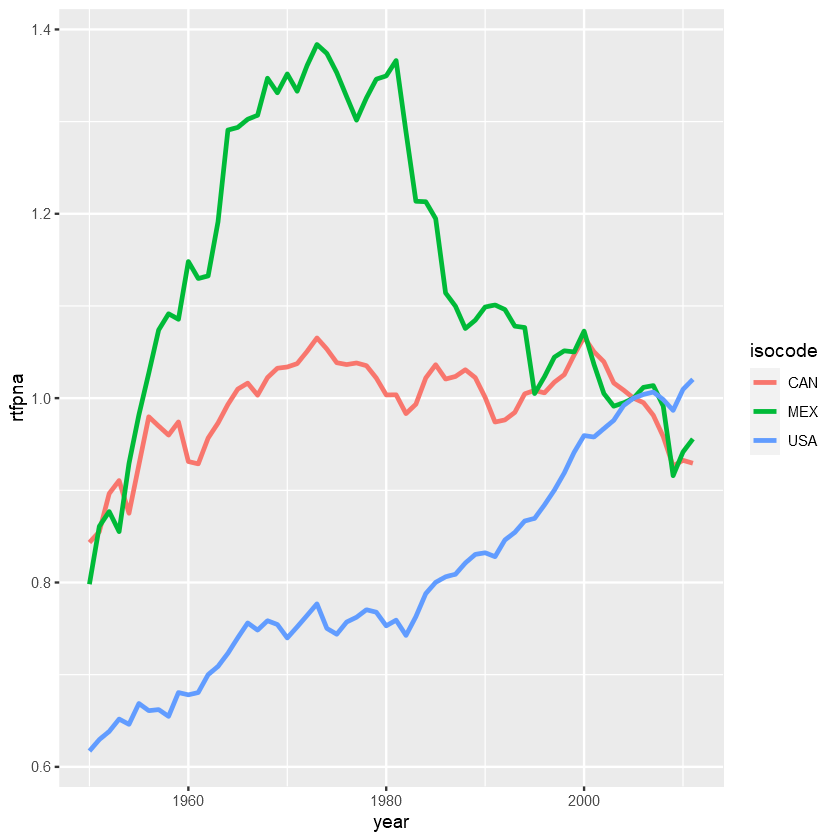

In [3]:
ggplot(df, aes(x = year, y = rtfpna)) + 
  geom_line(aes(color = isocode), size = 1) +
  theme_grey()

*As we have the variable for several countries, we will build a list in which each element of the list is the dataframe for a respective country. This composite structure allows us to easily manipulate the data.*

In [4]:
myList <- list()
countries <- unique(df$isocode)

for (i in 1:length(countries)) {
  aux <- df %>% filter(isocode == countries[i])
  dates <- unique(aux$year)
  aux <- aux$rtfpna
  aux <- ts(aux,
            start = dates[1],
            end = dates[length(dates)],
            freq = 1)
  myList[[i]] <- aux
  rm(aux)
}

In [5]:
names(myList) <- countries

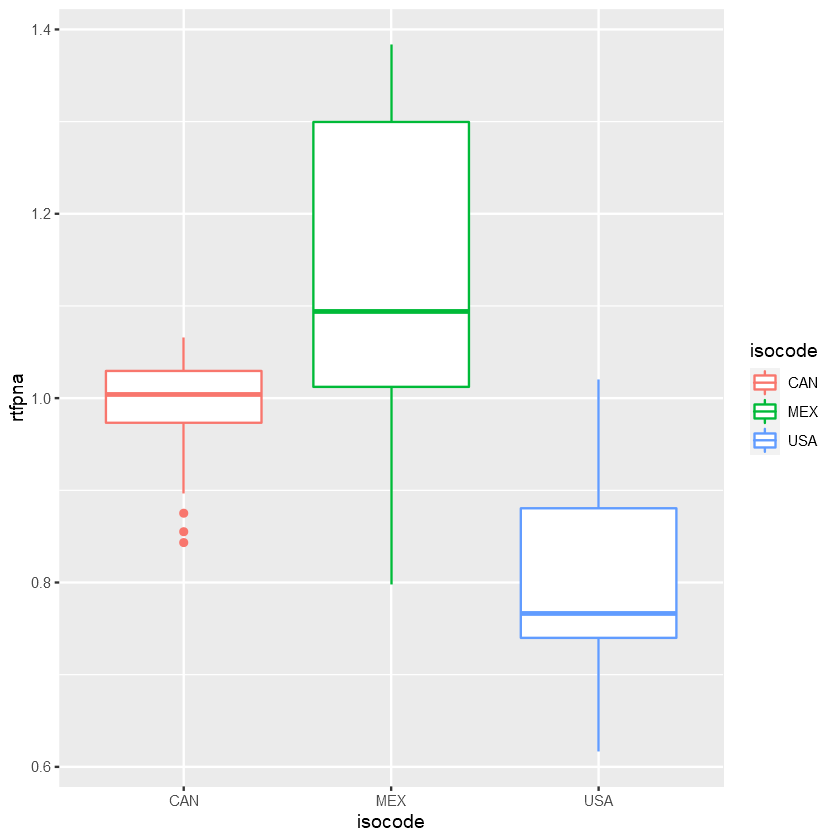

In [6]:
ggplot(df, aes(x = isocode, y = rtfpna, color = isocode)) +
  geom_boxplot()

In [7]:
summary(myList$USA)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.6171  0.7399  0.7660  0.8038  0.8805  1.0204 

In [8]:
summary(myList$MEX)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.7982  1.0122  1.0939  1.1301  1.2996  1.3837 

In [9]:
summary(myList$CAN)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.8433  0.9733  1.0042  0.9929  1.0295  1.0661 

## Rolling average analysis

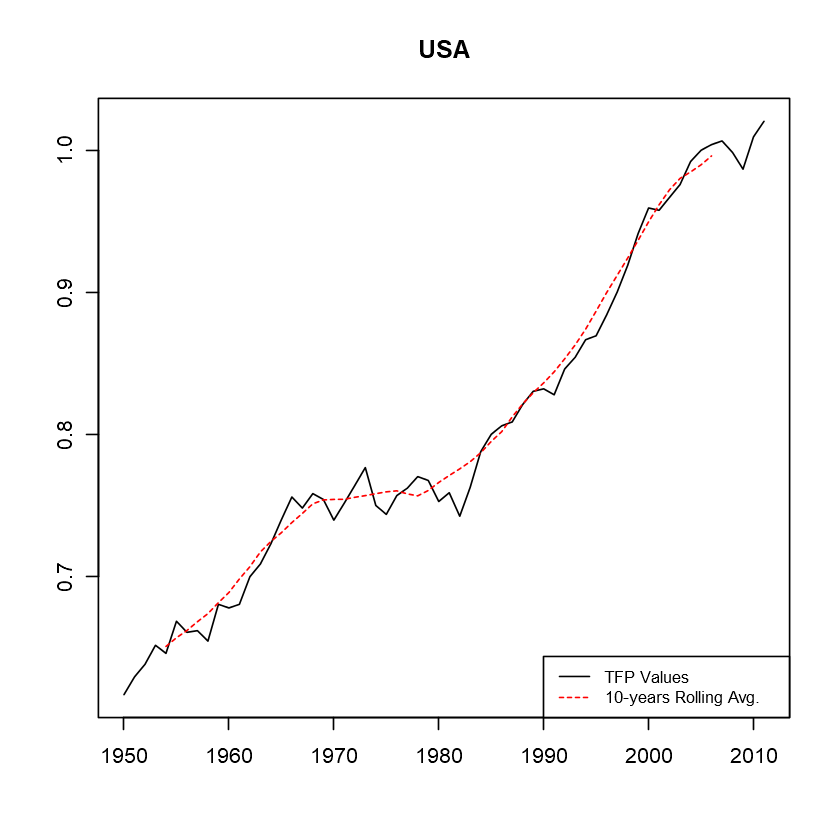

In [10]:
plot(myList[[1]], ylab ='', xlab = '', main = countries[[1]])
lines(rollapply(myList[[1]], 10, mean), col = 'red', lty = 2)
legend('bottomright', legend=c("TFP Values", "10-years Rolling Avg."),
       col=c("black", "red"), lty = 1:2, cex = 0.8)

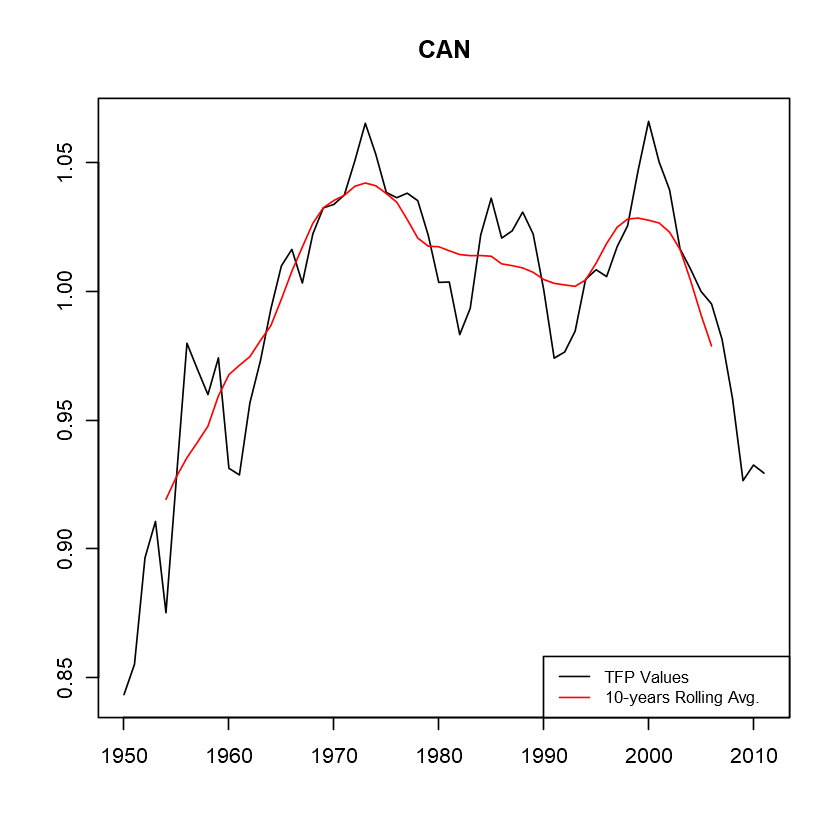

In [11]:
plot(myList[[2]], ylab ='', xlab = '', main = countries[[2]])
lines(rollapply(myList[[2]], 10, mean), col = 'red')
legend('bottomright', legend=c("TFP Values", "10-years Rolling Avg."),
       col=c("black", "red"), lty=1:1, cex=0.8)

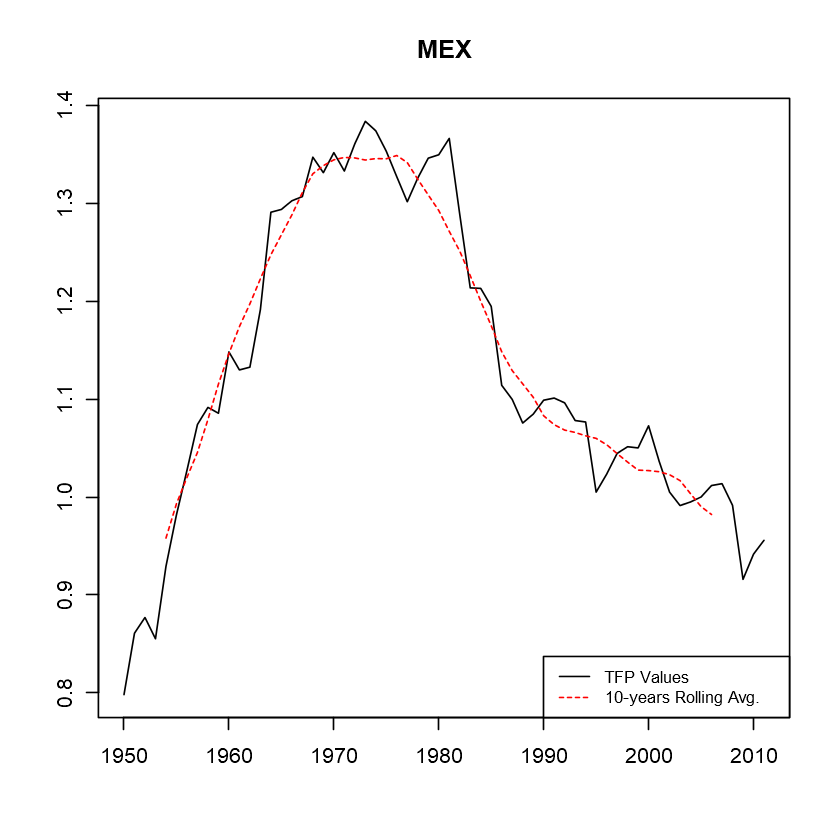

In [12]:
plot(myList[[3]], ylab ='', xlab = '', , main = countries[[3]])
lines(rollapply(myList[[3]], 10, mean), col = 'red', lty = 2)
legend('bottomright', legend=c("TFP Values", "10-years Rolling Avg."),
       col=c("black", "red"), lty=1:2, cex=0.8)

## Rolling standard deviation analysis

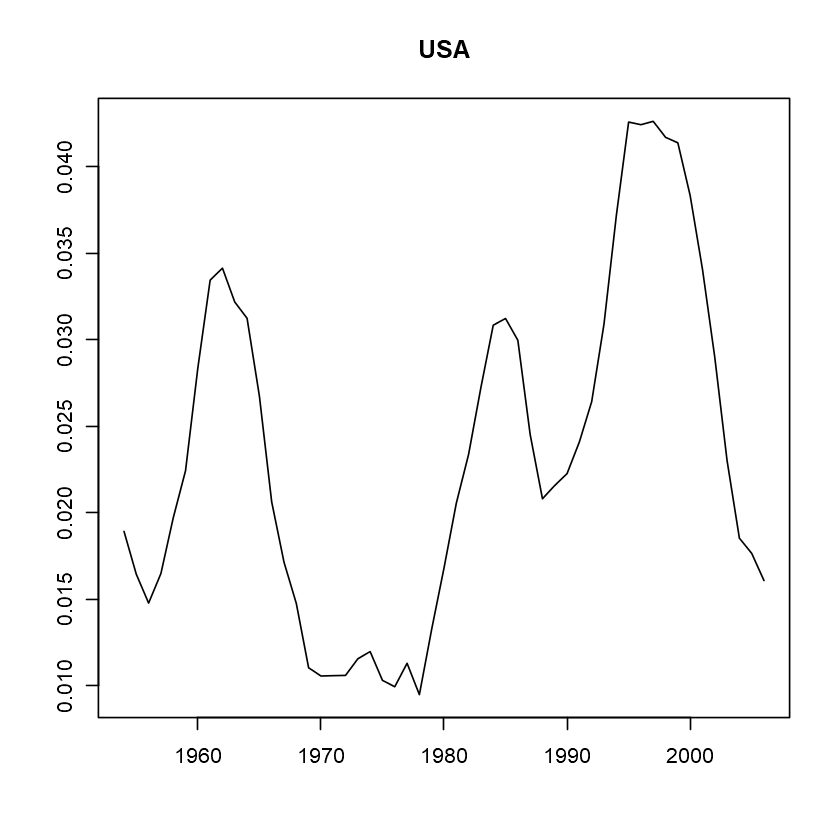

In [13]:
plot(rollapply(myList[[1]], 10, sd), main = countries[[1]],
     ylab = '', xlab = '')

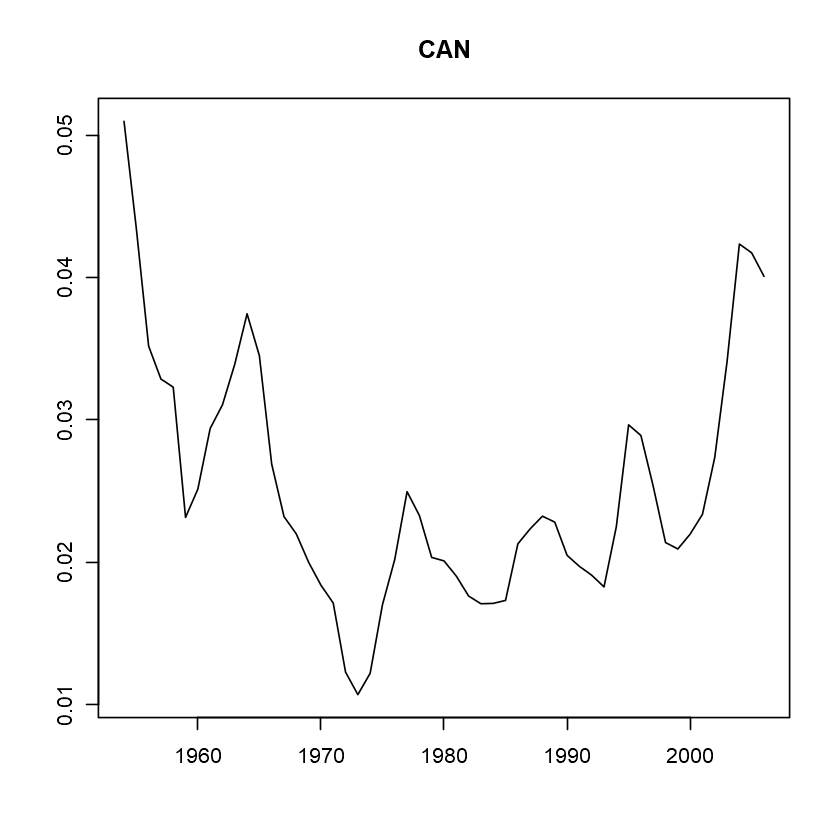

In [14]:
plot(rollapply(myList[[2]], 10, sd), main = countries[[2]],
     ylab = '', xlab = '')

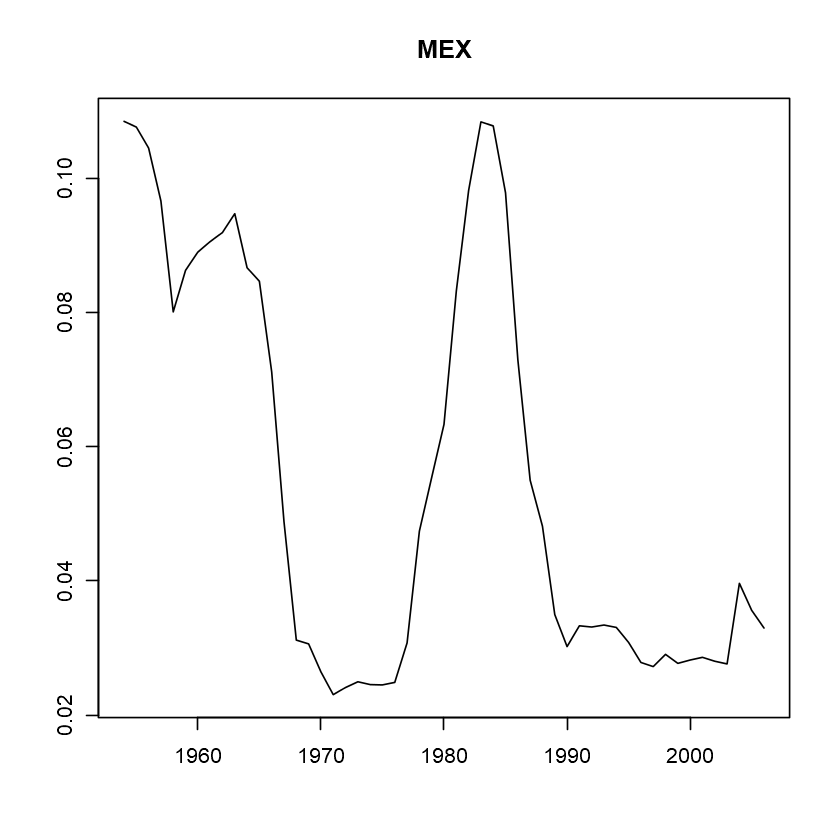

In [15]:
plot(rollapply(myList[[3]], 10, sd), main = countries[[3]],
     ylab = '', xlab = '')

## Autocorrelation analysis

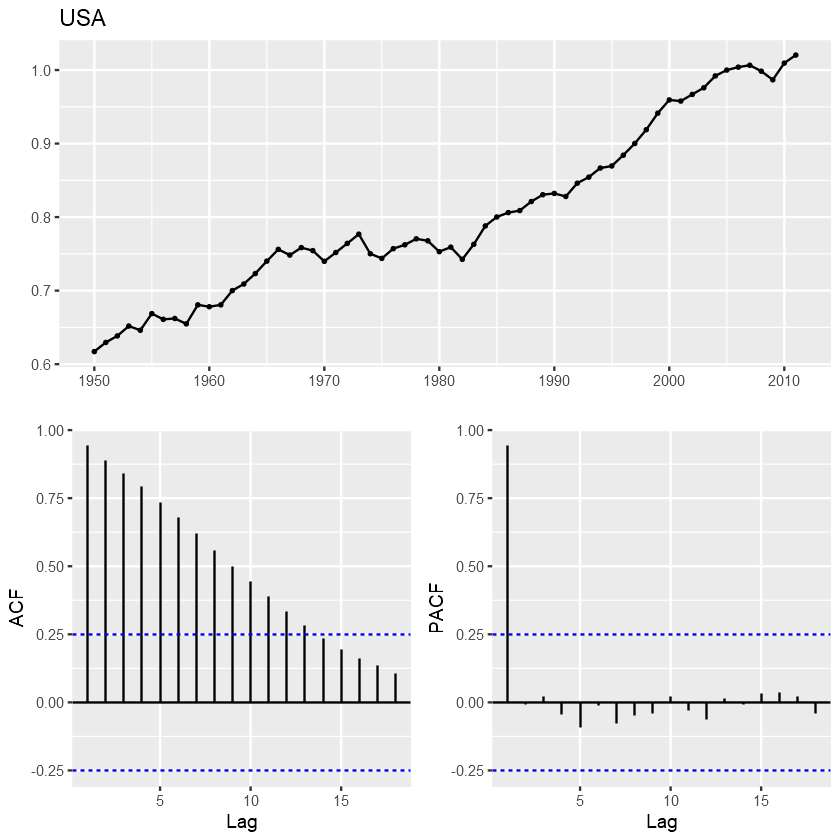

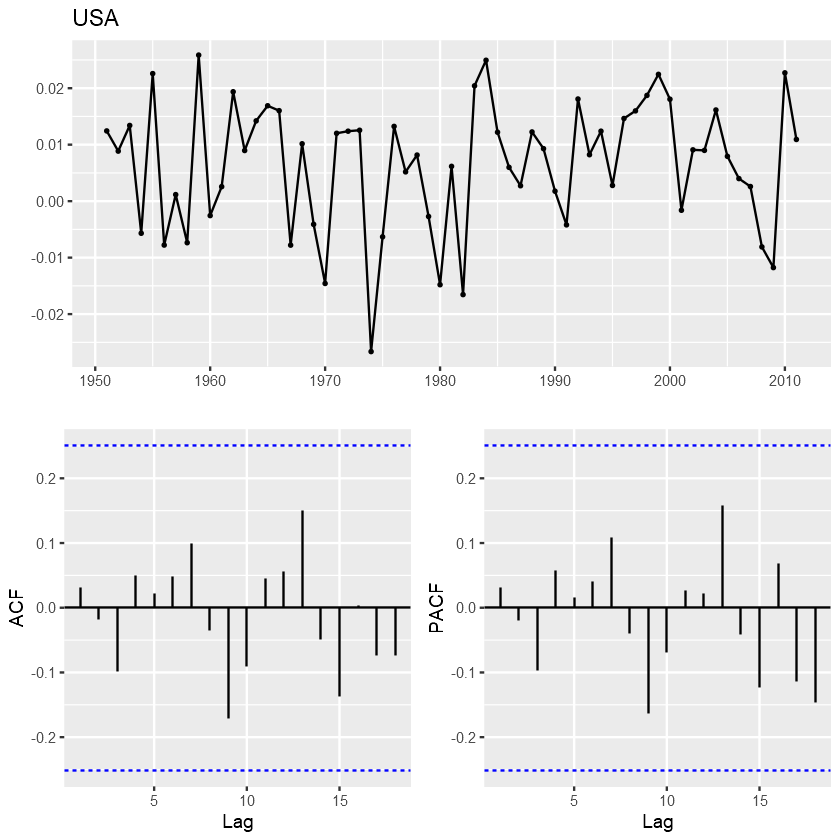

In [16]:
# Series on level
myList[[1]] %>% ggtsdisplay(main = countries[1])

# First difference
myList[[1]] %>% diff() %>% ggtsdisplay(main = countries[1])

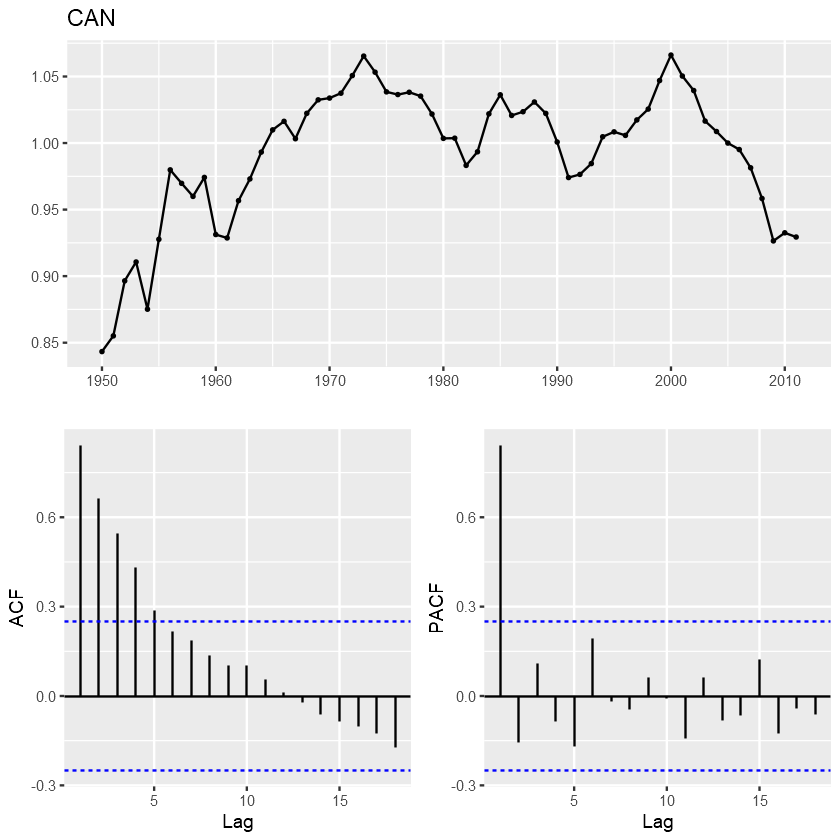

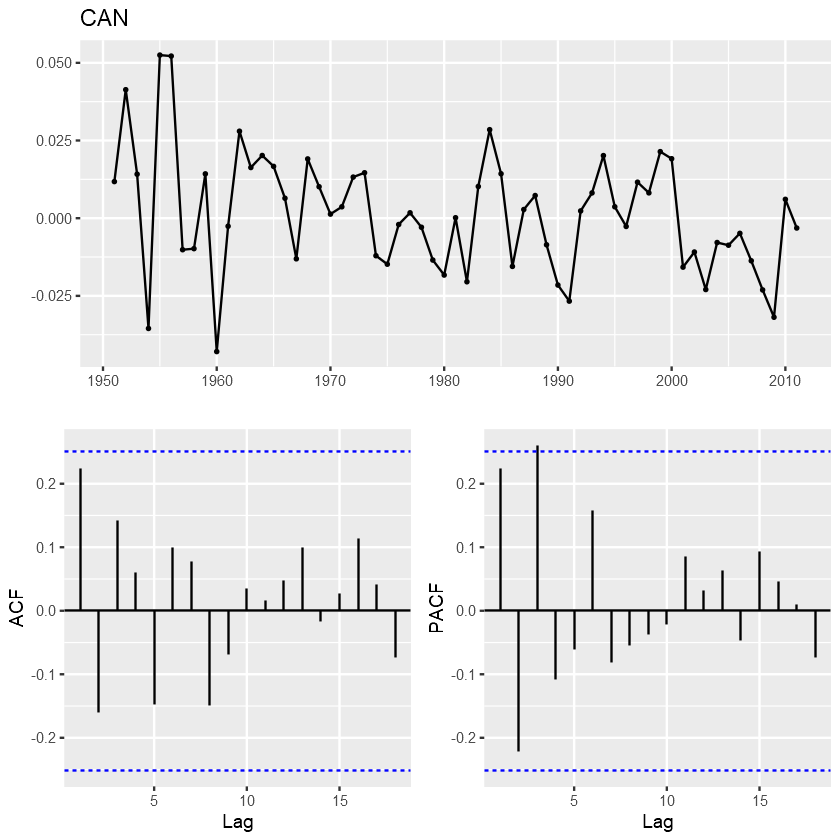

In [17]:
# Series on level
myList[[2]] %>% ggtsdisplay(main = countries[2])

# First difference
myList[[2]] %>% diff() %>% ggtsdisplay(main = countries[2])

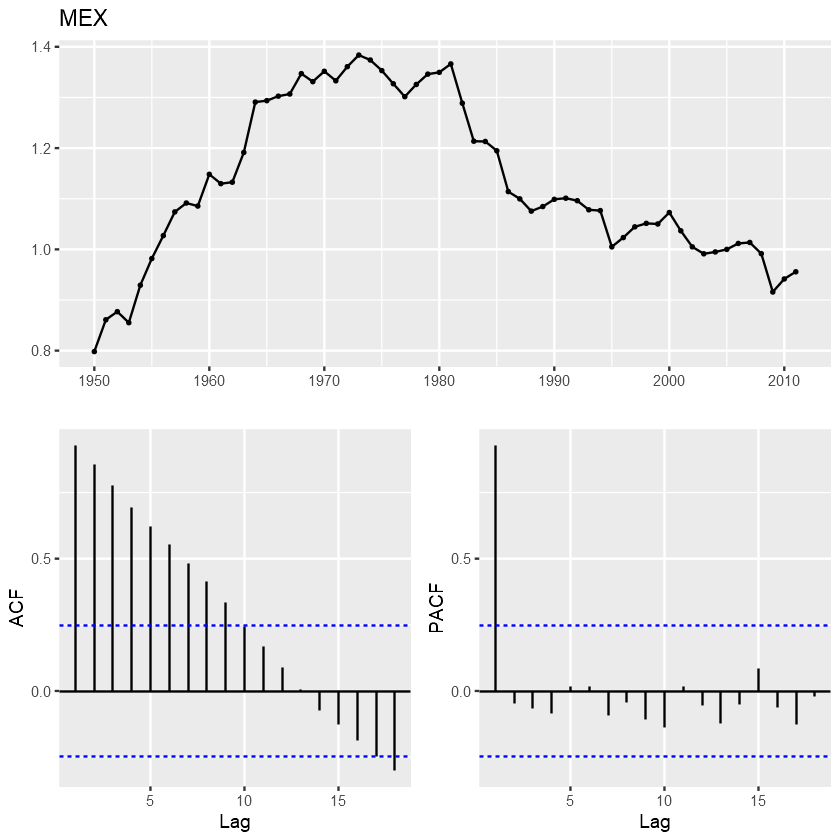

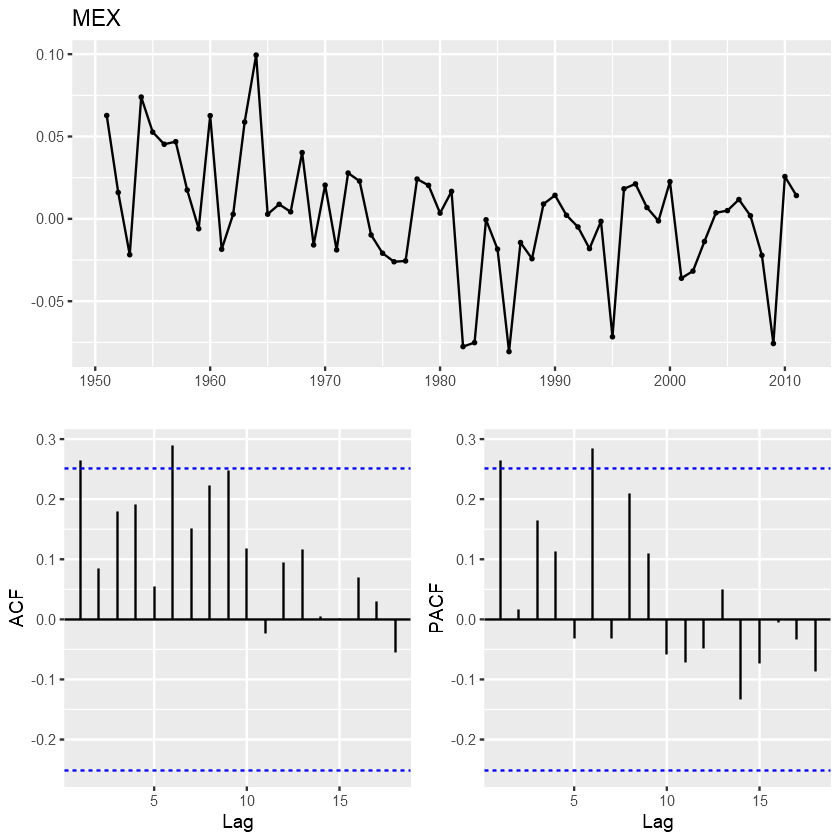

In [18]:
# Series on level
myList[[3]] %>% ggtsdisplay(main = countries[3])

# First difference
myList[[3]] %>% diff() %>% ggtsdisplay(main = countries[3])

# Question 2 <a name = "question2"></a>


## 10 years forecast

*For this part of the exercise, we chose to make a traditional estimation of an ARIMA model for each series, using the auto.arima function. After estimating the model, we perform the forecast for the requested period and make a diagnosis of the model's residues.*

## USA model

     Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
2012       1.027002 1.012444 1.041561 1.004737 1.049268
2013       1.033613 1.013024 1.054202 1.002125 1.065101
2014       1.040223 1.015007 1.065440 1.001659 1.078788
2015       1.046834 1.017717 1.075951 1.002303 1.091365
2016       1.053445 1.020891 1.085999 1.003657 1.103232
2017       1.060055 1.024394 1.095716 1.005516 1.114594
2018       1.066666 1.028147 1.105184 1.007757 1.125575
2019       1.073276 1.032098 1.114454 1.010300 1.136253
2020       1.079887 1.036211 1.123563 1.013090 1.146683
2021       1.086497 1.040459 1.132536 1.016088 1.156907

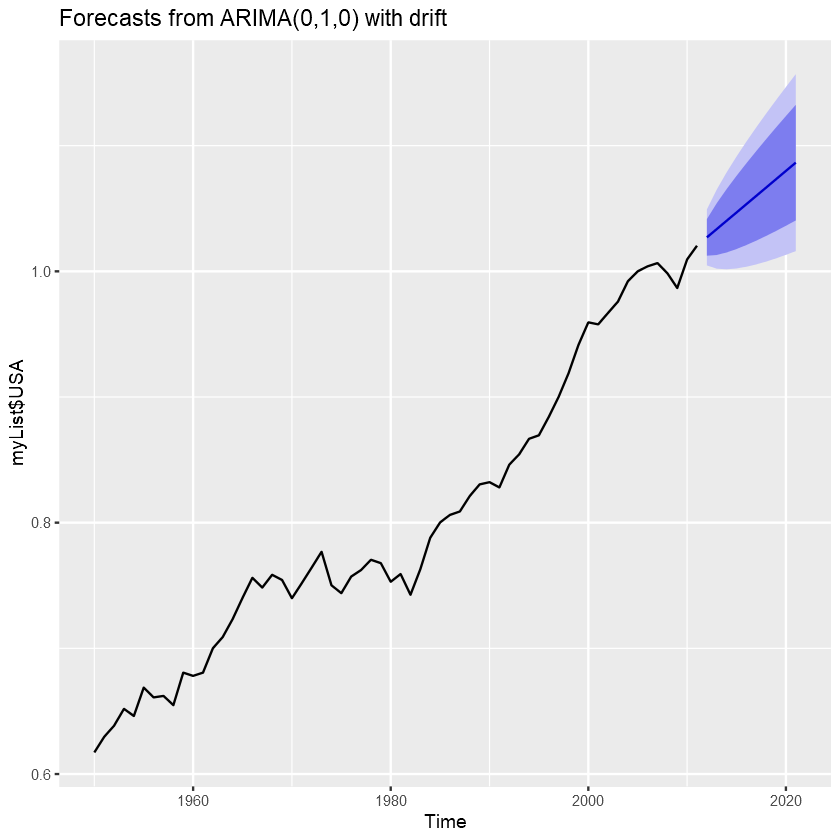


	Ljung-Box test

data:  Residuals from ARIMA(0,1,0) with drift
Q* = 4.69, df = 9, p-value = 0.8604

Model df: 1.   Total lags used: 10



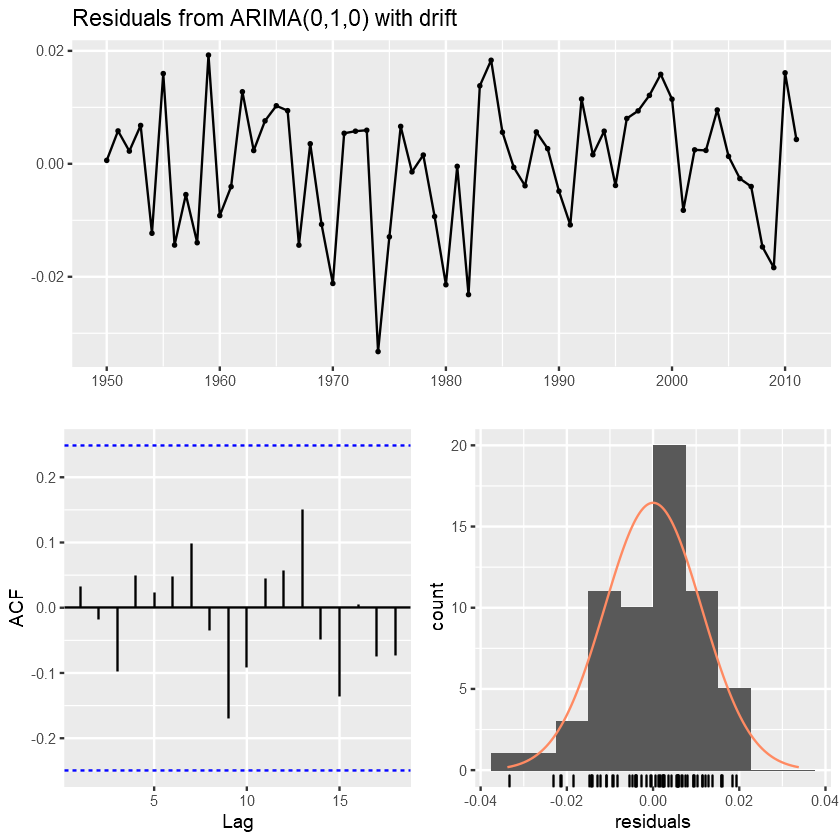

In [19]:
modelo <- auto.arima(myList$USA)
f <- forecast(modelo, 10)
f
autoplot(forecast(modelo))
checkresiduals(modelo)

## CAN model

     Point Forecast     Lo 80     Hi 80     Lo 95     Hi 95
2012      0.9171747 0.8936983 0.9406512 0.8812706 0.9530788
2013      0.9123099 0.8727405 0.9518792 0.8517937 0.9728260
2014      0.9057691 0.8567515 0.9547866 0.8308031 0.9807350
2015      0.8992282 0.8411095 0.9573470 0.8103433 0.9881132
2016      0.8926874 0.8255945 0.9597804 0.7900776 0.9952973
2017      0.8861466 0.8100921 0.9622012 0.7698312 1.0024621
2018      0.8796058 0.7945364 0.9646753 0.7495033 1.0097084
2019      0.8730650 0.7788867 0.9672434 0.7290317 1.0170984
2020      0.8665242 0.7631170 0.9699315 0.7083765 1.0246720
2021      0.8599834 0.7472099 0.9727569 0.6875112 1.0324556

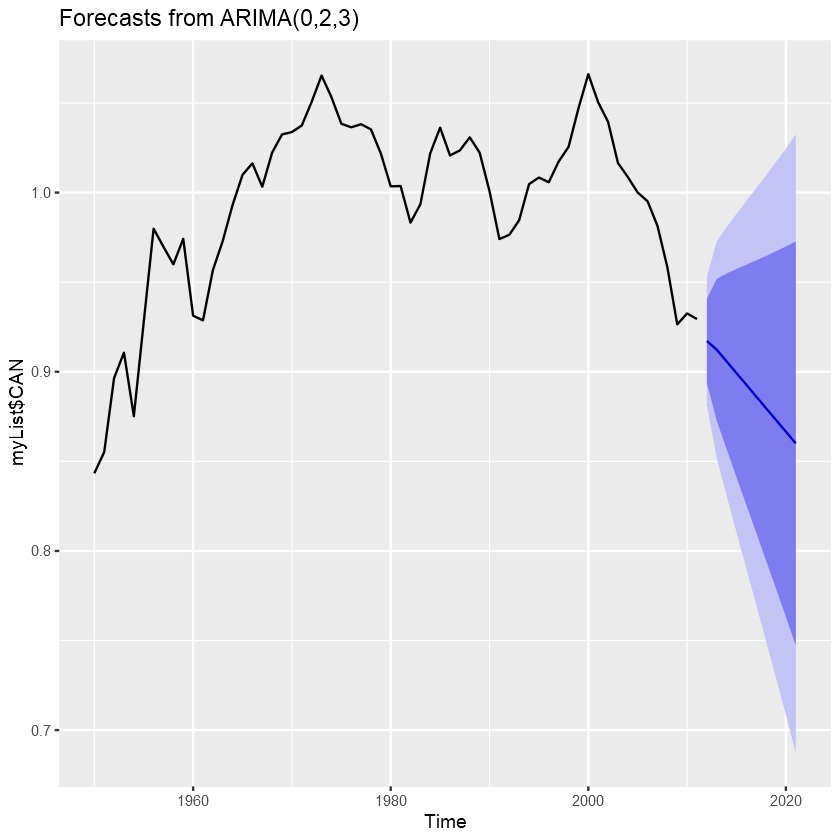


	Ljung-Box test

data:  Residuals from ARIMA(0,2,3)
Q* = 7.8537, df = 7, p-value = 0.3457

Model df: 3.   Total lags used: 10



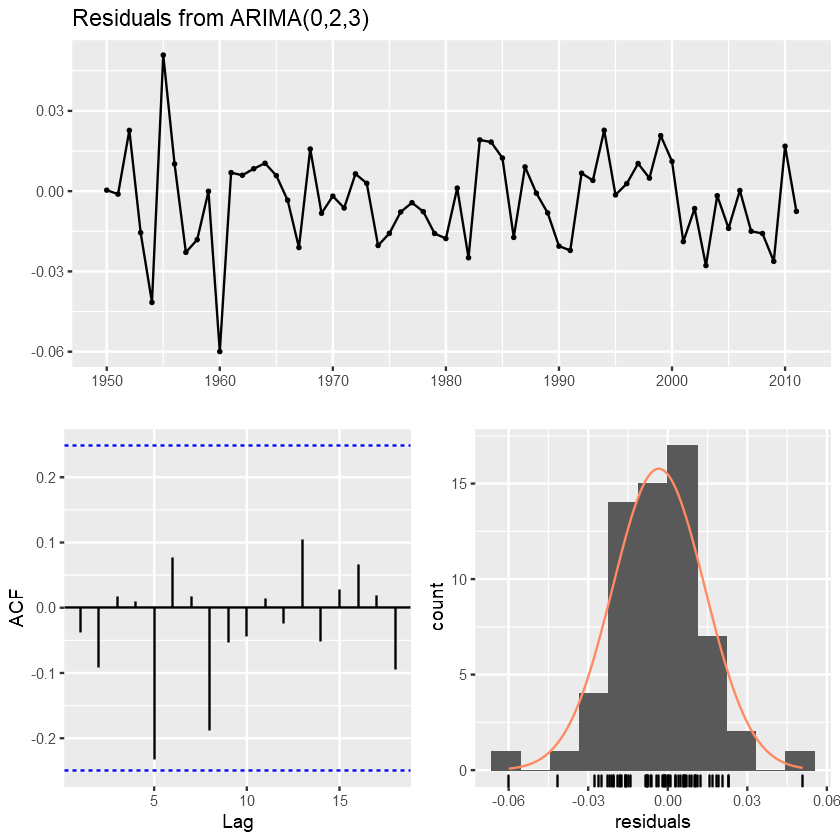

In [20]:
modelo <- auto.arima(myList$CAN)
f <- forecast(modelo, 10)
f
autoplot(forecast(modelo))
checkresiduals(modelo)

## MEX model

     Point Forecast     Lo 80     Hi 80     Lo 95    Hi 95
2012      0.9494087 0.9056291 0.9931883 0.8824535 1.016364
2013      0.9430517 0.8763397 1.0097637 0.8410245 1.045079
2014      0.9366947 0.8490163 1.0243731 0.8026021 1.070787
2015      0.9303377 0.8221078 1.0385676 0.7648143 1.095861
2016      0.9239807 0.7950811 1.0528803 0.7268458 1.121116
2017      0.9176237 0.7676980 1.0675494 0.6883322 1.146915
2018      0.9112667 0.7398389 1.0826946 0.6490905 1.173443
2019      0.9049097 0.7114401 1.0983794 0.6090234 1.200796
2020      0.8985527 0.6824678 1.1146377 0.5680793 1.229026
2021      0.8921958 0.6529048 1.1314867 0.5262319 1.258160

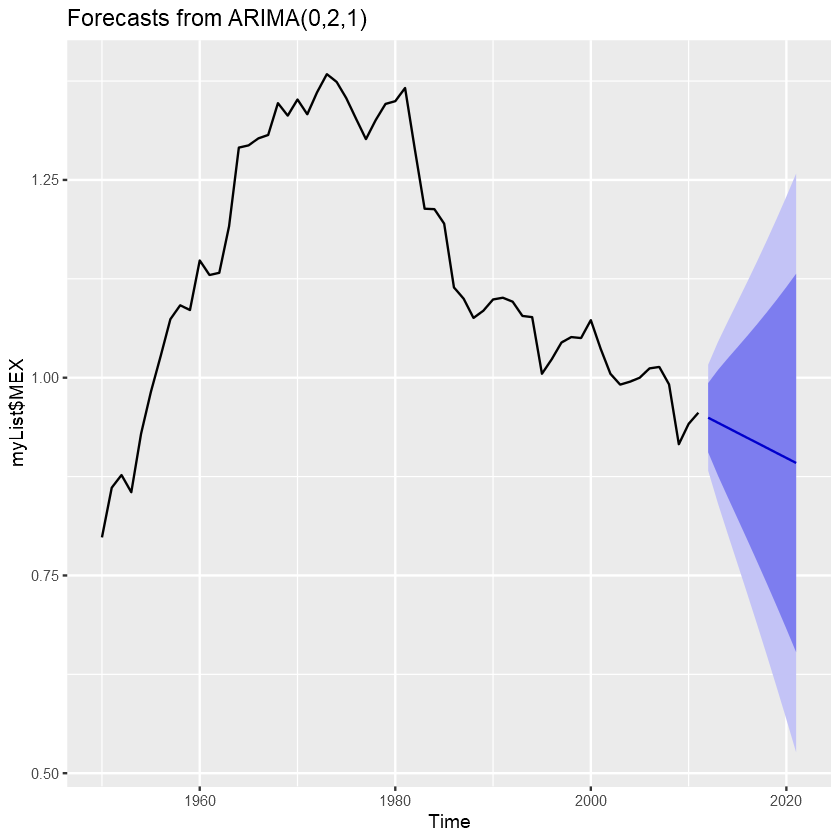


	Ljung-Box test

data:  Residuals from ARIMA(0,2,1)
Q* = 9.8924, df = 9, p-value = 0.3593

Model df: 1.   Total lags used: 10



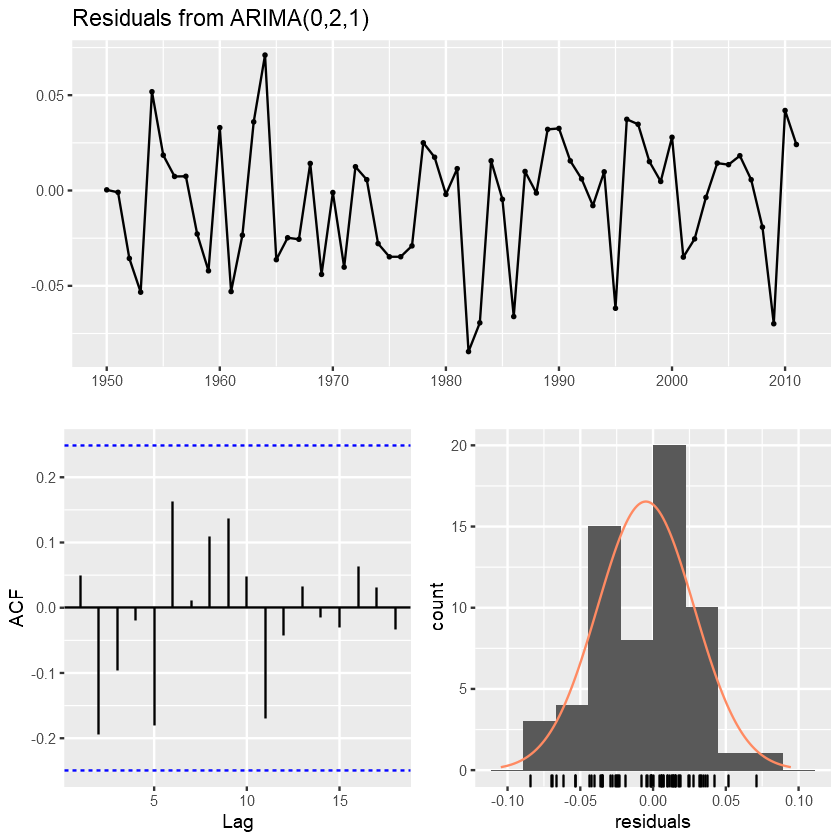

In [21]:
modelo <- auto.arima(myList$MEX)
f <- forecast(modelo, 10)
f
autoplot(forecast(modelo))
checkresiduals(modelo)

# Question 3 <a name = "question3"></a>

## Possible feature for TFP series


*The suggested features are: degree of commercial opening, number of new companies, closing of old companies, sectorial protection and good credit policies. The rationale for these suggestions follows below*.

*For a long time there was a focus on the idea that productivity was a sectoral characteristic. A country would develop from the moment it left an activity that was not very productive, such as agriculture, and went to industrialization. This fact is indeed an interesting conjecture, but empirical evidence for this has not been observed throughout history: most of the difference in TFP between countries is not due to sectoral composition. Most of the change in productivity gains comes from changes within sectors. They are new companies that appear and manage to be better than the old ones, such that the old companies die. This cycle of new companies is very important for mature economies. Additionally, the difference in productivity between these companies is an important factor. In Brazil, for example, we have a lot of sectorial protection for inefficient sectors. This hampers the development process.*